<a href="https://colab.research.google.com/github/samersonal/LSTM-Time-Series-Forecasting-/blob/main/LSTM_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname = 'jena_climate_2009_2016.csv.zip',
    extract = True)
csv_path, _= os.path.splitext(zip_path)

13568290/13568290 [==============================] - 0s 0us/step


In [ ]:
df = pd.read_csv(csv_path)
df.head(10) # 10 mins for 8 years data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [ ]:
df.shape

(420551, 15)

In [ ]:
df = df[5::6] #Starting from 5 take every 6 instance
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [ ]:
df.shape

(70091, 15)

In [ ]:
df.index = pd.to_datetime(df['Date Time'], format = '%d.%m.%Y %H:%M:%S')

In [ ]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [ ]:
df.drop('Date Time', axis = 1 ) # Remove the date time as we have it in index

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


<Axes: xlabel='Date Time'>

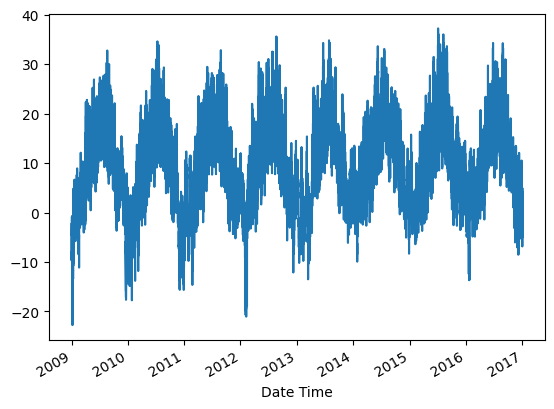

In [ ]:
temp = df['T (degC)']
temp.plot()
#We see that the data is fluctuating in a day and year.

In [ ]:
#For every 5 hours we will try to predict for the next hours
# 1, 2, 3, 4, 5 0' clock to predict 6 o'clock and then we bump it up for 7 remove 1

In [ ]:
#[[1,2,3,4,5]] [6]
#[[2,3,4,5,6]] [7]
#[[3,4,5,6,7]] [8]
#Coverting a forcasting model to a supervised model


def df_to_X_y(df, window_size = 5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+5]]
    X.append(row)
    label = df_as_np[i+5]
    y.append(label)

  return np.array(X), np.array(y)



In [ ]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [ ]:
X #Only for temperature in the dataset

array([[[-8.05],
        [-8.88],
        [-8.81],
        [-9.05],
        [-9.63]],

       [[-8.88],
        [-8.81],
        [-9.05],
        [-9.63],
        [-9.67]],

       [[-8.81],
        [-9.05],
        [-9.63],
        [-9.67],
        [-9.17]],

       ...,

       [[ 2.44],
        [ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ]],

       [[ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75]],

       [[-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75],
        [-2.89]]])

In [ ]:
y

array([-9.67, -9.17, -8.1 , ..., -2.75, -2.89, -3.93])

In [ ]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam



model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp = ModelCheckpoint('model1/', save_best_only = True)
model1.compile(loss= MeanSquaredError(), optimizer= Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [ ]:
model1.fit(X_train, y_train, validation_data= (X_val, y_val), epochs=10 , callbacks=[cp])


Epoch 1/10
1875/1875 [==============================] - 19s 8ms/step - loss: 51.0145 - root_mean_squared_error: 7.1424 - val_loss: 1.7560 - val_root_mean_squared_error: 1.3251
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 3.2351 - root_mean_squared_error: 1.7986 - val_loss: 0.6682 - val_root_mean_squared_error: 0.8174
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.0801 - root_mean_squared_error: 1.0393 - val_loss: 0.5726 - val_root_mean_squared_error: 0.7567
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.7691 - root_mean_squared_error: 0.8770 - val_loss: 0.5281 - val_root_mean_squared_error: 0.7267
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6929 - root_mean_squared_error: 0.8324 - val_loss: 0.5066 - val_root_mean_squared_error: 0.7117
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.6668 - root_mean_squared_error: 0.8166 - val_

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')


In [ ]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data = {'train_predictions':train_predictions, 'Actuals':y_train})
train_results

1875/1875 [==============================] - 6s 3ms/step


,train_predictions,Actuals
0,-9.901547,-9.67
1,-9.697429,-9.17
2,-8.909542,-8.10
3,-7.403071,-7.66
4,-7.302169,-7.04
...,...,...
59995,6.095541,6.07
59996,7.223292,9.88
59997,11.832854,13.53
59998,15.471839,15.43


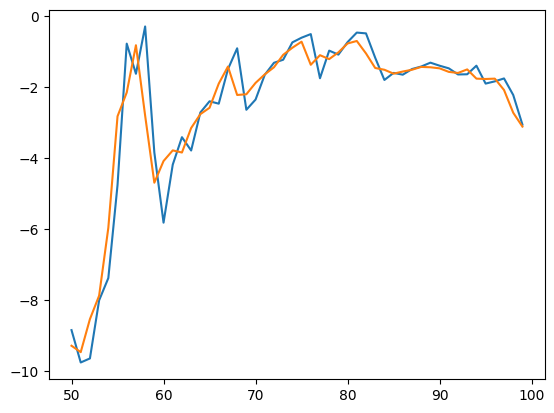

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['train_predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [ ]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data = {'val_predictions':val_predictions, 'Actuals':y_val})
val_results

157/157 [==============================] - 1s 7ms/step


,val_predictions,Actuals
0,15.668837,14.02
1,13.262237,13.67
2,13.038049,12.27
3,11.480353,11.19
4,10.360692,10.85
...,...,...
4995,17.402952,18.27
4996,17.441532,17.85
4997,17.190620,16.65
4998,15.841460,15.85


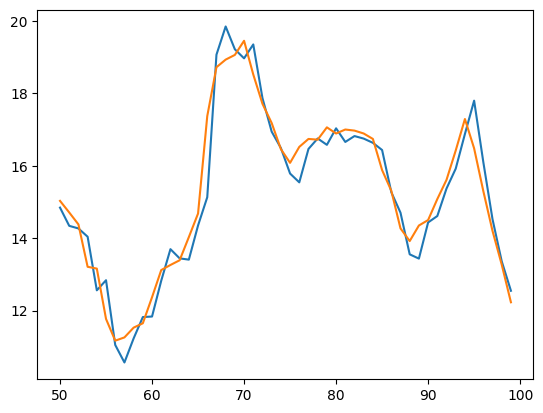

In [ ]:
import matplotlib.pyplot as plt
plt.plot(val_results['val_predictions'][50:100])
plt.plot(val_results['Actuals'][50:100])

In [ ]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data = {'test_predictions':test_predictions, 'Actuals':y_test})
test_results

159/159 [==============================] - 1s 7ms/step


,test_predictions,Actuals
0,14.390101,13.99
1,13.239348,13.46
2,12.900841,12.93
3,12.521976,12.43
4,12.089698,12.17
...,...,...
5081,-1.175488,-0.98
5082,-1.572346,-1.40
5083,-1.701557,-2.75
5084,-3.296839,-2.89


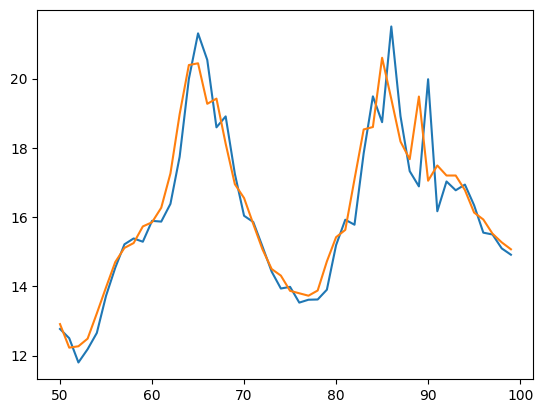

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_results['test_predictions'][50:100])
plt.plot(test_results['Actuals'][50:100])